Missing values before dropping:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Missing values after dropping:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


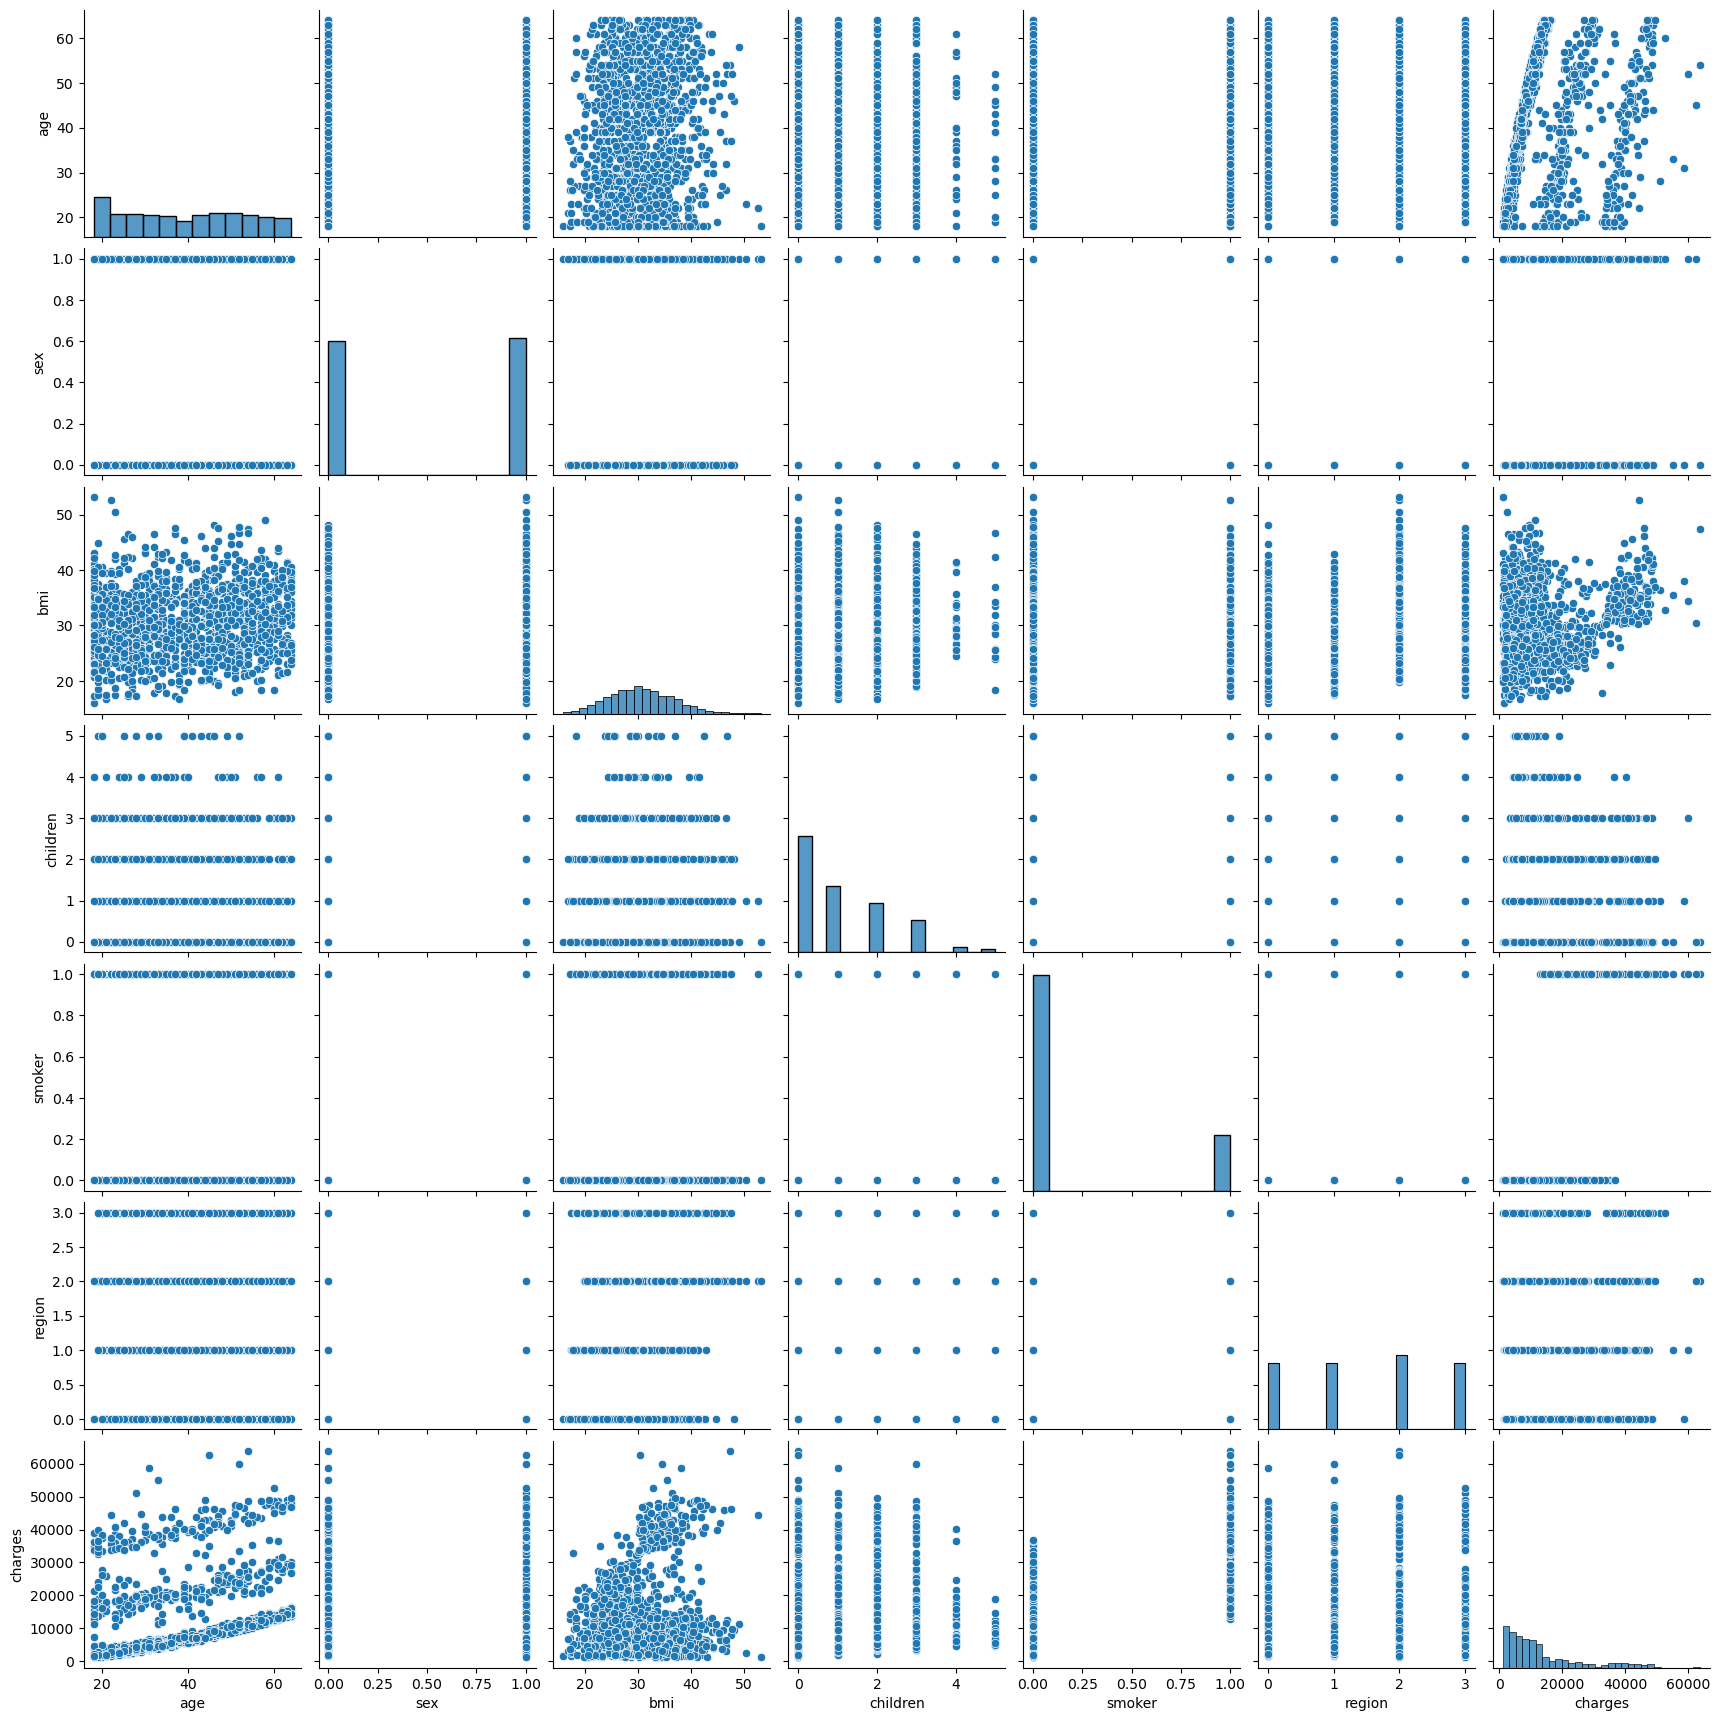

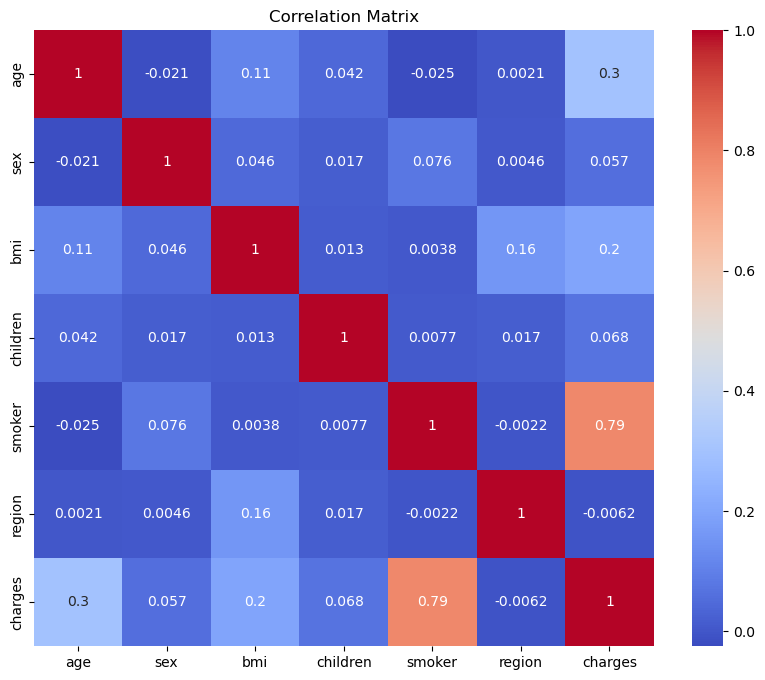

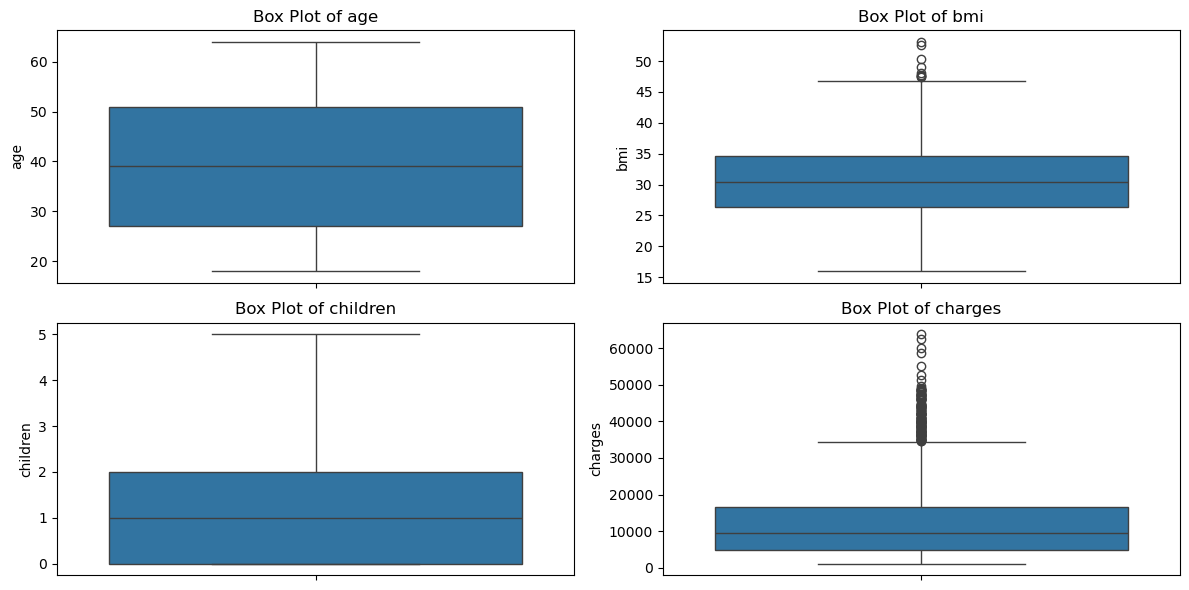

Training set size: 1070
Validation set size: 134
Test set size: 134

Model Performance on Validation Set:
Decision Tree (max_depth=4):
R2 Score: 0.8693
MSE: 18639166.2307
MAE: 2516.7131

Random Forest (n_estimators=50):
R2 Score: 0.8574
MSE: 20338254.5318
MAE: 2482.3303

SVR:
R2 Score: -0.0553
MSE: 150487096.7579
MAE: 8011.6231

Final Results on Test Set:
Decision Tree: R2 Score = 0.8593
Random Forest: R2 Score = 0.8715
SVR: R2 Score = -0.0891


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Download the Dataset
# Using the saved file at the specified path
file_path = r"C:\Users\marca\Downloads\insurance.csv"

# Step 2: Read the Dataset
# Reading the CSV data into a DataFrame
df = pd.read_csv(file_path)

# Check for missing values and drop them if any
print("Missing values before dropping:")
print(df.isnull().sum())
df = df.dropna()
print("\nMissing values after dropping:")
print(df.isnull().sum())

# Step 3: Perform Preprocessing
# Create a copy for visualization with encoded values
df_encoded = df.copy()

# Encode categorical variables
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df_encoded['sex'] = le_sex.fit_transform(df_encoded['sex'])
df_encoded['smoker'] = le_smoker.fit_transform(df_encoded['smoker'])
df_encoded['region'] = le_region.fit_transform(df_encoded['region'])

# Scale numerical features for X
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']
scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'children']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Step 4: Prepare Visualization
# Pair plots using encoded data
sns.pairplot(df_encoded)
plt.show()

# Correlation matrix heatmap using encoded data
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Box plots for numerical features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features + ['charges']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[feature])  # Using original data for better interpretability
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# Step 5: Split the Data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

# Step 6: Training Regressors
def evaluate_model(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    return r2, mse, mae

# Decision Tree Regressor with cross-validation
dt_scores = []
depths = range(1, 11)
for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='r2')
    dt_scores.append(scores.mean())

best_depth = depths[np.argmax(dt_scores)]
dt_model = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
dt_r2, dt_mse, dt_mae = evaluate_model(dt_model, X_train, X_val, y_train, y_val)

# Random Forest Regressor with cross-validation
rf_scores = []
estimators = [10, 50, 100, 200]
for n in estimators:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
    rf_scores.append(scores.mean())

best_n = estimators[np.argmax(rf_scores)]
rf_model = RandomForestRegressor(n_estimators=best_n, random_state=42)
rf_r2, rf_mse, rf_mae = evaluate_model(rf_model, X_train, X_val, y_train, y_val)

# SVR
svr_model = SVR(kernel='rbf')
svr_r2, svr_mse, svr_mae = evaluate_model(svr_model, X_train, X_val, y_train, y_val)

# Print results
print("\nModel Performance on Validation Set:")
print(f"Decision Tree (max_depth={best_depth}):")
print(f"R2 Score: {dt_r2:.4f}")
print(f"MSE: {dt_mse:.4f}")
print(f"MAE: {dt_mae:.4f}")

print(f"\nRandom Forest (n_estimators={best_n}):")
print(f"R2 Score: {rf_r2:.4f}")
print(f"MSE: {rf_mse:.4f}")
print(f"MAE: {rf_mae:.4f}")

print("\nSVR:")
print(f"R2 Score: {svr_r2:.4f}")
print(f"MSE: {svr_mse:.4f}")
print(f"MAE: {svr_mae:.4f}")

# Compare models on test set
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'SVR': svr_model
}

print("\nFinal Results on Test Set:")
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: R2 Score = {r2:.4f}")